# Математический анализ. Лабораторная работа №1

*Объявление:*
Если у Вас возникает какая-либо ошибка и вы совершенно не понимаете, что не так, то:

`1.` Внимательно изучите текст ошибки, ведь он зачастую подсказывает, что же не так;  
`2.` Перечитайте внимательно код ещё раз;  
`3.` Попросите помощи у одногруппников/учебных ассистентов.

Если возникнут вопросы по поводу формулировок задач, писать в tg (@linalgisthefallengod)

## №1. Библиотеки. Графики в Sympy

In [2]:
# Вначале для простоты будем подключать модуль sympy целиком
# Запустите данный код
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

Для начала научимся строить графики функций от одной переменой. Например, $f(x) = 11x^4 + 3x^3 - 2x^2 - 10$

Построить график этой функции можно с помощью метода `plot`.

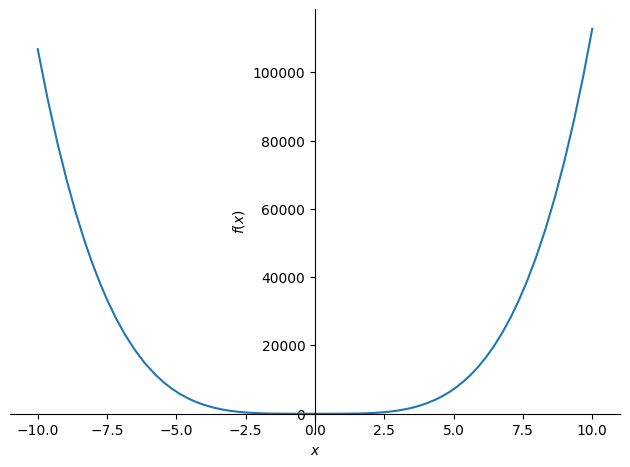

In [3]:
# Test this
x = Symbol('x')
f = 11*x**4 + 3*x**3 - 2*x**2 - 10
plot(f)

В примере выше мы определили переменную `x`. Для этого воспользовались методом symbols(). Про его возможности можно ознакомиться вот [тут](hhttps://docs.sympy.org/latest/modules/core.html#sympy.core.symbol.symbols).

Можно задать интервал значений переменной, для которого требуется построить график. Можно передавать выражение для функции в
качестве аргумента `plot`. Для того, чтобы задать интервал значений переменной, нужно указать значение необязательного параметра,
представляющего собой `tuple` из имени переменной, левого и правого конца интервала.
Если на одном графике нужно изобразить несколько функций, причем каждую на своем интервале, то при вызове `plot` перечисляются через
запятую `tuple`, состоящие из выражения для функции (или имени переменной, в которую это выражение записано) и `tuple`, описывающей
интервал значений функции (этот `tuple` состоит из имени переменной, левого и правого конца интервала).



А теперь построим на одном графике функции $\tan (x)$ на $[-\pi/3, \pi/3]$, $e^{x}$ на $[-2, 1]$ и $\ln{x}$ на $[0.1, 2]$

Составим список из функций и список из интервалов, на основе этих списков составим tuple, состоящий из tuple, содержащих выражение
для функции и tuple из имени переменной, левого и правого конца интервала.

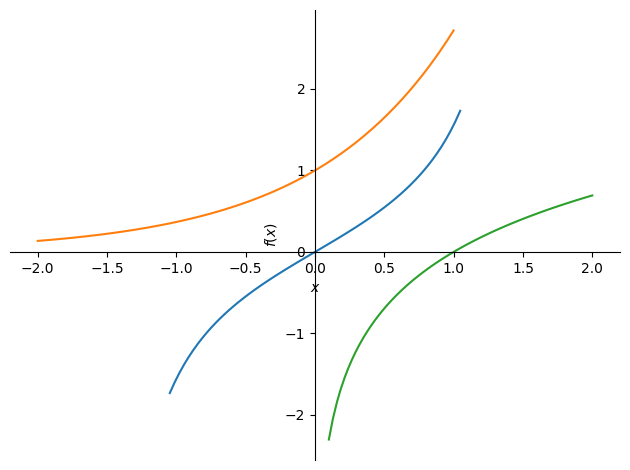

In [4]:
funcs = [tan(x), exp(x), ln(x)]
intervals = [(-pi/3, pi/3), (-2, 1), (0.1, 2)]
n = len(funcs)
func_to_plot = tuple((funcs[i], (x, intervals[i][0], intervals[i][1])) for i in range(n))
plot(*func_to_plot)

Цвет линии определяется параметром `line_color`, который по умолчанию равен `blue`.

Для того, чтобы на одном графике вывести несколько функций разных цветов нужно создать несколько графиков с помощью plot, но не
изображать их, а собрать в список с помощью append. Для того, чтобы график не изображался, изменим параметр show,
равный по умолчанию True.

Построим на одном графике функции $x^2, cos(x)$ на $[-\pi, \pi]$, изобразив каждую из них желаемым цветом.

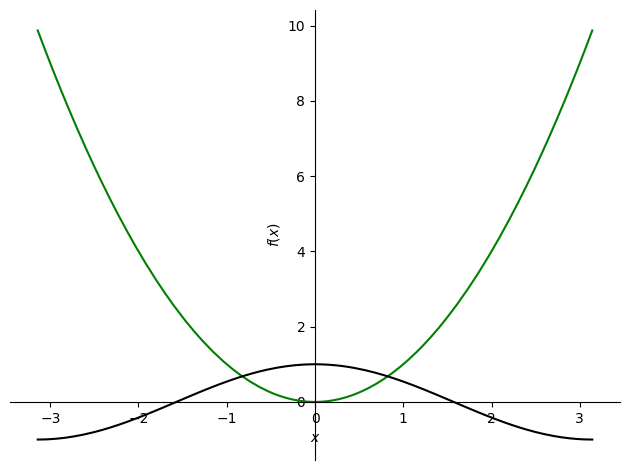

In [5]:
interval = (x, -pi, pi)
p = plot(x**2, interval, line_color='green', show=False)
p.append(plot(cos(x), interval, line_color='black', show=False)[0])
p.show()

Кстати у `plot` есть ещё куча аргументов, с которыми при желании Вы сможете ознакомиться на сайте:
https://docs.sympy.org/latest/modules/plotting.html?highlight=plot#module-sympy.plotting.plot

#### **Задание 1.1 [2 балла]**

Построить график $\frac{1}{\sin(x)}$ на интервале $(\pi, 5\pi)$ без асимптот, задать предел по вертикальной оси (-10, 10). Подписать графики


*Предел определяется параметром `xlim` либо `ylim`.*

*Указание:*

График разбить на части, исключив точки разрыва. При построении `tuple` с именем переменной и интервалом ее значений от точки разрыва
отступить на 0.01, т.е. использовать $(x, \pi + 0.01, 2\pi - 0.01)$ вместо $(x, \pi, 2\pi)$.
Для удобства пользуйтесь циклом $for$, чтобы создать `tuple`, состоящий из `tuple`, содержащих выражение для функции и `tuple` из имени
переменной, левого и правого конца интервала.
Не забудьте об $y_{lim}=(-7, 7)$!


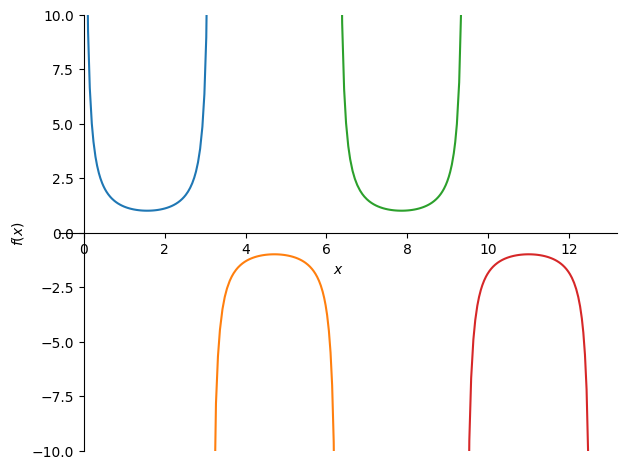

In [6]:
function = 1 / sin(x)
intervals = [(x, pi * i + 0.01, pi * (i + 1) - 0.01) for i in range(4)]
n = len(intervals)
func_to_plot = tuple((function, intervals[i]) for i in range(n))
plot(*func_to_plot, ylim=(-10, 10))

#### **Задание 1.2 [2 балла]**

Построить на отрезке $[−4𝜋, 4𝜋]$ график $\sqrt{x}$ синим цветом, а график $e^{-x^2}$ красным, задать предел по вертикальной оси $(-4, 4)$.

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


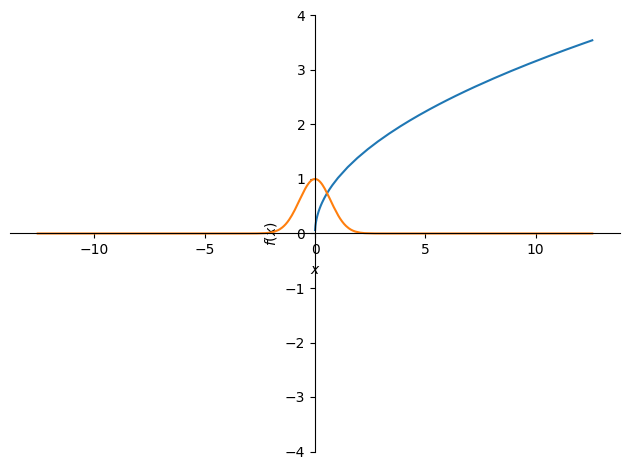

In [13]:
from math import e

functions = x ** 0.5, e ** (-1 * x ** 2)
interval = (x, -4 * pi, 4 * pi) 
func_to_plot = tuple((functions[i], interval) for i in range(2))
plot(*func_to_plot, ylim=(-4, 4))

#### **Задание 1.3 [3 балла]**

Построить графики $\log_{2}{x}$, $\log_{10}{x}$, $\ln{x}$ в одной плоскости, каждый график отдельным цветом $("red", "green", "black")$. Отобразить название графика "Логарифмы по основанию 2, 10, и $e$", подписать горизонтальную ось $x$,вертикальную ось $\log_a{x}$. Включить легенду, в ней все функции подписать своими формулами, например, натуральный логарифм $ln{x}$,десятичный $lg{x}$. $x$ должен принимать значения от 0.01 до 3.


Предел по вертикальной оси выставляйте любой.

*Указание.*


Можно составить подходящий словарь, list или tuple и использовать его в plot. Вначале можно построить только координатную плоскость с
надписью графика и подписями осей, а также legend=True, а затем в цикле добавлять с помощью append графики функций разных цветов.

In [14]:
x = symbols("x")

functions = 
interval = (x, 10, 100)
func_to_plot = tuple((functions[i], interval) for i in range(2))
plot(*func_to_plot, ylim=(-4, 4), legend=True)

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable log2 method

#### График неявно заданной функции



Изобразить график уравнения, например, окружности, удобнее с помощью функции `plot_implicit`.

 Уравнение неявно заданной функции
передается `plot_implicit` как `Equality`, сокращенно `Eq`. Аргументами `Eq` выступают левая и правая части уравнения (*lhs* и *rhs* соответственно).

Построим график функции $cos(x^2 + y^2) =  tan(x^2 + y^2) \cdot cos(x + y)$

*Примечание: будьте терпеливыми*

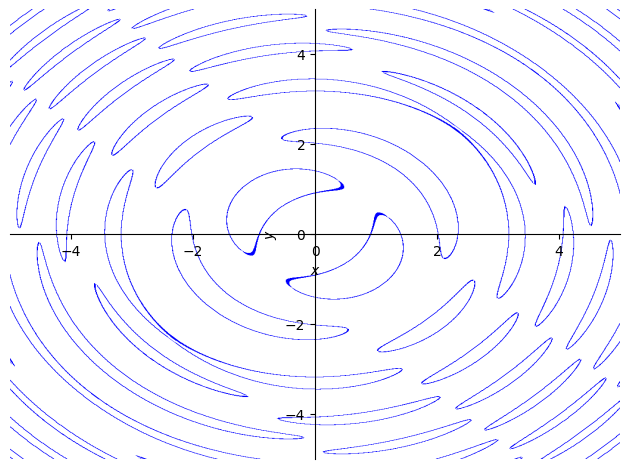

In [15]:
x, y = symbols('x y')
plot_implicit(Eq(cos(x**2 + y**2), tan(x**2 + y**2) * cos(x + y)),
 (x, -5, 5),
 (y, -5, 5),
)

А теперь построим график функции $tan(x \cdot sin(x)) = tan(y \cdot sin(y))$

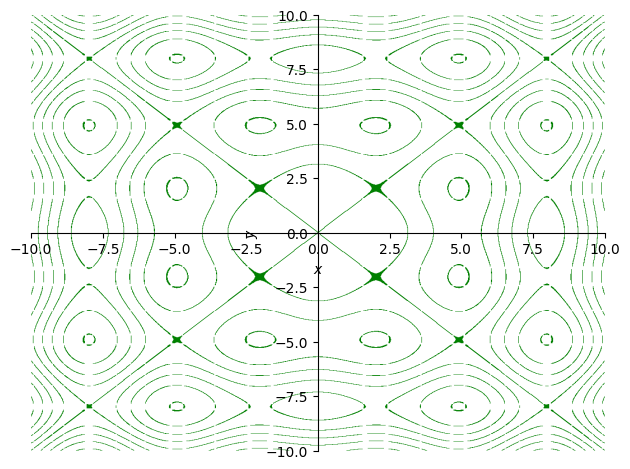

In [16]:
x, y = symbols('x y')
plot_implicit(Eq(tan(x * sin(x)), tan(y * sin(y))),
 (x, -10, 10),
 (y, -10, 10),
  line_color='green'
)

#### **Задание* 1.4 Бонусное [1 балл]**

Придумайте сами такую неявно заданную функцию, график которой выглядит достаточно забавно и красиво.

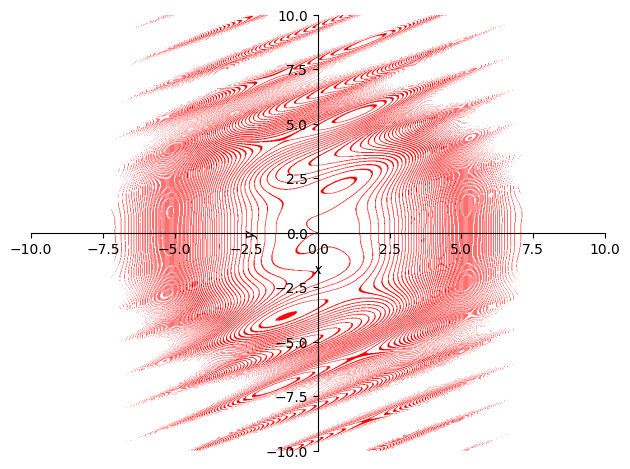

In [18]:
x, y = symbols('x y')
plot_implicit(Eq(tan(x ** 3 + y ** 2 * cos(x - 2 * y)), 0),
 (x, -10, 10),
 (y, -10, 10),
  line_color='red'
)

#### **Задание 1.5 [3 балла]**

Изобразить функцию  $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ на листке бумаги, казалось бы, невозможно. Однако с этой задачей справлялись топографы задолго до изобретения 3D-графики, составляя карты рельефа.

На двумерной карте рельефа каждой точке мы сопоставляем цвет, который отображает некоторую физическую величину, например, высоту над уровнем моря. Аналогично, каждой точке на декартовых координатах мы можем сопоставить значение некоторой функции в ней.

Для создания такого графика мы будем использовать библиотеки ``matplotlib`` и ``numpy``. На самом деле, когда вы писали ``plot(...)``, передавая в качестве аргументов объекты-функции модуля ``sympy``, ``plot`` передавала работу библиотекам  ``matplotlib`` и ``numpy``. Простота такого подхода компенсируется его ограниченностью. Чтобы увеличить возможности по визуализации, необходимо выбрать более низкоуровневый подход.

Ниже приведён код-пример по созданию графика с помощью ``matplotlib``

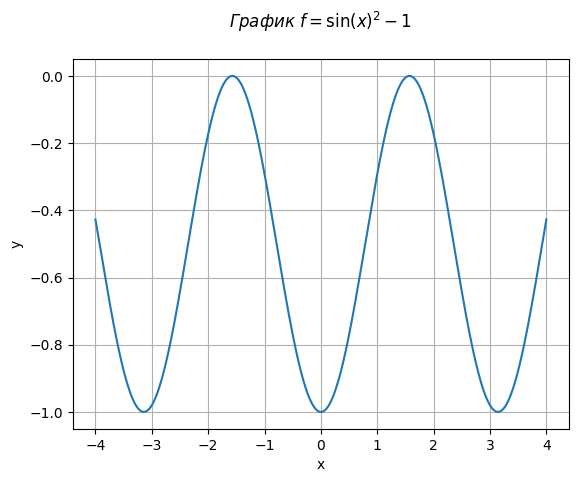

In [27]:
import matplotlib.pyplot as plt

def f(x):
    '''
    В качестве аргумента передаётся два вектора класса np.array
    np.sin(x) находит синус каждого из чисел этого произвольного массива
    
    return: массив значений функции в точках массива x
    '''
    
    return np.sin(x) ** 2 - 1


# Создаём массив из 1000 точек от -4 до 4
# Расположенных равномерно
x_values = np.linspace(-4, 4, 1000)

# Рисуем сам график
plt.plot(x_values, f(x_values))

# Даём ему название
plt.title('$График \ f=\sin(x)^2 - 1$\n')

# Подписываем оси
plt.xlabel('x')
plt.ylabel('y')

# Добавляем координатную сетку
plt.grid()

plt.show()

Ваша задача - визуализировать функцию $f(x, y) = (x - 2)^2 + (3 - y)^2$ на $[-4; 4] \times [-4; 4]$ с использованием библиотеки ``matplotlib`` и цветного рисунка. Добавить ``colorbar``, оси подписать, добавить название графика.

>подсказка: для создания множества значений функций вам поможет функция ``np.meshgrid``

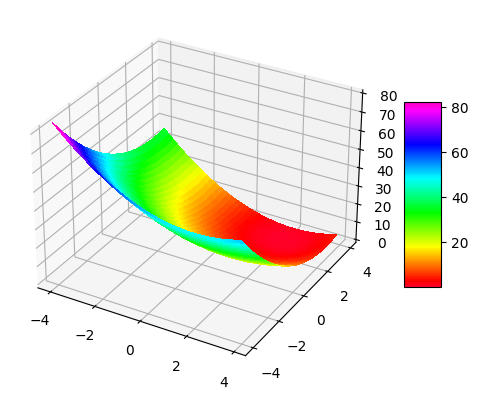

In [57]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-4, 4, 0.1)
Y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X - 2) ** 2 + (3 - Y) ** 2

surface = ax.plot_surface(X, Y, Z, cmap=cm.gist_rainbow,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 80)
ax.zaxis.set_major_locator(LinearLocator(9))

fig.colorbar(surface, shrink=0.5, aspect=5)

plt.show()

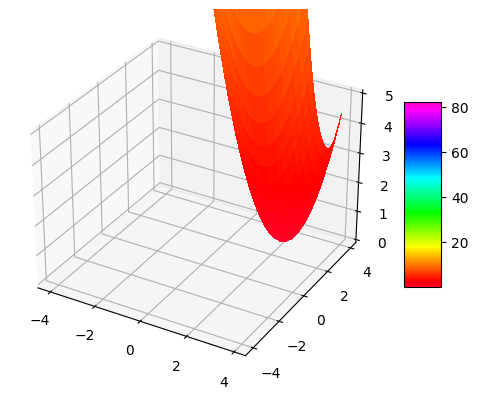

In [55]:
# визуализация в оригинальном размере

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-4, 4, 0.1)
Y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X - 2) ** 2 + (3 - Y) ** 2

surface = ax.plot_surface(X, Y, Z, cmap=cm.gist_rainbow,
                       linewidth=0, antialiased=False)

ax.set_zlim(0, 5)
ax.zaxis.set_major_locator(LinearLocator(6))

fig.colorbar(surface, shrink=0.5, aspect=5)

plt.show()

#### **Задание 1.6 [0.75 балла]**

2) Есть ли у функции точка локального минимума или максимума? Что это за точка (минимум/максимум + координаты) 

Да, при $\frac{\partial f}{\partial x}=0$ и $\frac{\partial f}{\partial y}=0$

$f(x,y)=(x-2)^2+(3-y)^2$

$f'_x=2(x-2)=0\Rightarrow x=2$

$f'_y=-2(3-y)=0\Rightarrow y=3$

$(x_0, y_0)=(2,3)$

Это точка минимума (потому что всё выражение $\geq 0$ + видно по графику)

#### **Задание 1.7 [1.5 балла]**

Вернёмся к более прямолинейному подходу и попробуем нарисовать $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ с помощью трёхмерной графики. Для этого также следует использовать библиотеку ``matplotlib``. Узнайте, как делать трёхмерные графики в ней и визуализируйте функцию $f(x, y) = (x - 2)^2 + (3 - y)^2$ на $[-4; 4] \times [-4; 4]$. Оси подписать, добавить название графика.

#### **Задание 1.8 [1.5 балла]**

Нарисованный 3d график позволяет увидеть только одну проекцию данного изображения. Поверхность заслоняет всё, что находится за ней. Самое лучшее решение - сделать карту интерактивной с возможностью её поворачивать. Для этих целей существует библиотека plotly.

Визуализируйте функцию $f(x, y) = (x - 2)^2 + (3 - y)^2$ на $[-4; 4] \times [-4; 4]$, график подпишите.

In [62]:
# установка библиотеки, если она отсутствует
!pip install plotly

     -------------------------------------- 15.6/15.6 MB 945.4 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python310\\etc'
Consider using the `--user` option or check the permissions.



In [ ]:
import plotly.graph_objects as go

def f(x, y):
    # write your code here
    return 

fig = go.Figure(# write your code here...)

# write your code here...
# ...

fig.show()

#### **Задание 1.9 [3 балла]**

Реализуйте ещё один способ визуализации графиков функций $\mathbb{R}^2 \rightarrow \mathbb{R}$ (вспомните лекции или придумайте способ самостоятельно).

#### **Задание 1.10 [4 балла]**

Визуализировать функцию $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$

Поскольку мы ограничены тремя измерениями, в полной мере визуализировать функцию $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ не представляется возможным. Тем не менее, мы можем представить такую функцию как некоторую трансформацию числовой плоскости ([здесь](https://youtu.be/sD0NjbwqlYw?si=gfqBWQE2E2LRjjjT) и [здесь](https://www.youtube.com/watch?v=bohL918kXQk&t=286s) хорошо объяснён и изображён механизм трансформации числовой плоскости на примере дзета-функции Римана). Имеется в виду, что каждой точке числовой плоскости мы сопоставляем какую-то другую точку той же самой плоскости (аналогично с тем, как при визуализации школьных функций мы каждой точке из $\mathbb{R}$ сопоставляем точку из $\mathbb{R}$).

Для примера рассмотрим такую трансформацию: $f(x, y) = (-x, y)$. То есть каждой точке нашей плоскости сопоставляем точку, отражённую относительно оси OY. Можно думать, что мы взяли какое-то произвольное множество (например, множество синих точек) и изобразили множество, куда оно переходит под нашей трансформацией (красное множество).

In [ ]:
plt.imshow(plt.imread("transformation.png"))
plt.xticks([])
plt.yticks([])
plt.show()

 Множество, на котором мы рассматриваем трансформацию, может быть произвольным: точкой, прямой, кругом или чем-то ещё. Но чаще всего для таких отображений рассматривают трансформацию отрезков. Ваша задача - написать функцию которая будет визуализировать отображение $f(x, y) = (x e^y, y e^x)$ на $[-1; 1] \times [-1; 1]$  вышеописанным способом. 
 
Вы должны показать отображение не менее 5 вертикальных и 5 горизонтальных прямых. Кривые до и после отображения следует визуализировать на двух различных графиках с помощью функции ``plt.subplots``. (Подписать всё как и в прошлых пунктах)

In [ ]:
def f(x, y):
    return # Ваш код здесь


def draw_transform(f, x_lines=range(-2, 3, 1), y_lines=range(-2, 3, 1)):
    '''
    f = функция R^2 -> R^2
    x_lines = множество координат по оси x вертикальных прямых (по умолчанию целые числа от -2 до 2)
    y_lines = множество координат по оси y горизонтальных прямых (по умолчанию целые числа от -2 до 2)
    '''
    
    # Создаём подграфики
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Создаём координаты точек на этих прямых
    lines = # Ваш код здесь

    # Для каждой прямой рисуем на графике слева - её саму, 
    # на графике справа - отображение этой прямой
    for line in lines:
        axes[0].plot(# Ваш код здесь)
        axes[0].grid(0.5) # создём координатную сетку

            
        # множество точек на новых прямых
        after_transform = # Ваш код здесь
        axes[1].plot(# Ваш код здесь)
        axes[1].grid(0.5) # создём координатную сетку
    
    axes[1].set(xlabel='x', ylabel='y', title='grid after transformation')
    axes[0].set(xlabel='x', ylabel='y', title='grid before transformation')
    plt.show()
            

draw_transform(f)

#### **Задание 1.11 [1.5 балла]**

Непрерывно дифференцируемое преобразование локально выглядит также, как и некоторое линейное преобразование. Как найти это линейное преобразование?

**Your answer here**

#### **Задание 1.12 [3 балла]**

Сравните локально два отображения: изначальное и его линейное приближение. Возьмите достаточно маленькую окрестность точки (-1, 1). Выберите как минимум 5 прямых для наглядности.

In [ ]:
# Write your code here :)

Объясните что произошло. Сравните разные возможные окрестности заданной точки.

In [ ]:
# Write your code here :)

**Your text here**

## №2. Дифференцирование функций.

In [ ]:
#необходимые библиотеки для этого раздела
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

Продолжаем работать с секцией Calculus библиотеки SymPy. В этой части вам необходимо ознакомиться с возможностью считать производные и выводить красивые ответы. Библиотека позволяет быстро найти производную практически любой заданной функции.


В sympy производная находится аналитически с помощью `diff`, эту функцию можно использовать и как метод. Покажем на примере оба варианта вызова `diff`.

Найдем производную $f(x) = x^2 - \sin x$.

Вначале применим `diff` как функцию, ее аргументы - функция или выражение и имя переменной.

В нашем примере зададим $f(x)$ как выражение.

In [ ]:
from sympy.abc import x  #альтернативный способ определения символа
f = x**2 - Sin(x)
diff(f, x)

Теперь применим `diff` как метод, аргумент - имя переменной:

In [ ]:
f.diff(x)

Порядок производной является необязательным аргументом `diff` со значением по умолчанию 1. Для вычисления производный высоких порядков нужно указать порядок производной.

Например: Найдем производную второго порядка для функции $f(x) = x^2 - \sin x$.

Опишем $f(x)$ как функцию. Применим `diff` как метод.

In [ ]:
def f(x):
    return x**2 - Sin(x)
f(x).diff(x, 2)

Производные можно считать от функций с несколькими переменными.

Например: возьмем функцию $$f(x, y) = x^{123} \cdot y + y^{34} \cdot x^4$$



In [ ]:
x, y = symbols('x'), symbols('y')
func = (x ** 123) * y + (y ** 34) * (x ** 4)
div_func = diff(func, x)
div_func

Коротко о том что мы сделали: мы записали в переменную функцию `func` для которой мы хотим посчитать производную.
После всего этого в следующей строке мы воспользовались методом `diff` где вторым параметром указали по какой переменной мы хотим считать производную первого порядка (мы считали по`x`).

Теперь посчитаем по `y`

In [ ]:
x, y = symbols('x'), symbols('y')
func = (x ** 123) * y + (y ** 34) * (x ** 4)
div_func2 = diff(func, y)
div_func2

P.S. В этом разделе будет полезно ознакомиться с документацией.

Про производные можно ознакомиться [тут](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#calculus).

 Про метод `diff` и все его вытекающие можно ознакомиться [здесь.](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.diff)

#### **Задание 2.1 [3 балла]**

Написать функцию `def check_diff(seq: sympy.core.mul.Mul, x: sympy.Symbol, a: float) -> bool` для проверки дифференцируемости заданной функции в точке.

In [ ]:
#Write your solution here
def check_diff(seq: sympy.core.mul.Mul, x: sympy.Symbol, a: float) -> bool:
    pass

#### **Задание 2.2 [1 балл]**.

Напишите функцию ```find_derivative() -> str ```, которая возвращает строку-производную по `x` следующей функции:

$$f_2 = \frac{(\exp(x^2) + \arccos(x)}{x^2} + ln(x)\cdot cos(x)\cdot x^2 + \frac{\cot(x - 1)}{sin(x)} $$

**Важно**: в коде явно укажите, чему равна $f_2$. Например : `f_2 = 20 * x  + sin(x)`

Примечание: ручками считать это нельзя:)
Не забываем подключать нужные функции.

In [ ]:
#Write your solution here
f_2 =
def find_derivative() -> str:
    pass

#### **Аналитическое решение уравнений.**


Идея их использования: хотим найти точное символьное решение конкретной задачи.


Для решения нелинейных уравнений вида
$$
f(x) = 0
$$
можно использовать метод  `solve`, которому передается выражение $f(x)$ и переменная, относительно которой нужно решать уравнение. Возвращает solve список list корней уравнения, он может быть пустым или конечным.

Например:
Решим уравнение $x^2 - 1 = 0$ с помощью `solve`. Поскольку в левой части уравнения только одна переменная, ее можно явно не указывать.

In [ ]:
x = Symbol('x')
solve(x**2 - 1)

Для решения уравнения в вещественных числах можно использовать `solveset` с необязательным параметром  domain=S.Reals.

Укажем, что решение ищется только в вещественных числах:

In [ ]:
solveset(x**2 + 1, domain=S.Reals)

`Solveset` возвращает  множество set корней уравнения, оно может быть пустым, конечным или даже бесконечным.

Например:
Уравнение, имеющее бесконечно много решений $\sin(x)=0$.

In [ ]:
solveset(sin(x))

Уравнение в форме $f(x)=0$ можно решить численно с помощью `nsolve()`, для этого нужно задать выражение, определяющее функцию, переменную и начальное приближение.

`nsolve(f, [args,] x0, modules=['mpmath'], **kwargs)`

`f`  - вектор-функция, состоящая из символьных выражений, представляющих систему уравнений,

`args`  - переменные (если переменная одна, ее можно не указывать)

`x0` - начальное приближение

Точность решения определяется параметром по умолчанию `prec` (число знаков после запятой в результате).

Например, `nsolve(cos(x) - x, 1, prec=50)`

Например, Решим уравнение $x^2-1=0$ с помощью `solveset` и `nsolve`, для `nsolve` укажем начальное приближение 3:

In [ ]:
from sympy.abc import x # Это альтернативный способ определения символа.
display(solveset(x**2 - 1))
nsolve(x**2 - 1, x, 3)

Заметим, что nsolve выдает только одно решение.

Используем другое начальное приближение.

In [ ]:
nsolve(x**2 - 1, x, -3)

Про методы `solve` `solveset`
почитать можно [тут](https://docs.sympy.org/latest/modules/solvers/solveset.html)

Про метод `nsolve` почитать можно [здесь](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.nsolve)



#### **Задание 2.3 [3 балла]**.

 Предположим, у вас есть начальная сумма денег `initial`, и вы хотите инвестировать ее под фиксированный годовой процентный доход `extra`. Вам нужно найти, сколько времени `year` потребуется, чтобы ваша инвестиция достигла или превысила определенную целевую сумму `final`.

 Уравнение для этой задачи выглядит следующим образом:

$$ initial × \left(1 + \frac{extra}{100}\right)^{t} = final $$

Напишите функцию `check_time(initial: float, extra: float, final: float) -> int` чтобы определить сколько времени понадобится чтобы достичь желаемой цели.

In [ ]:
#Write your solution here

def check_time(initial: float, extra: float, final: float) -> int:
    pass

#### **Задание 2.4 [3 балла]**.

Представьте себе, что у вас есть экологический наблюдательный набор данных о популяции определенного вида животных в течение нескольких лет. Вам известно, что динамика $\frac{dN}{dt}$ этой популяции может быть описана следующим уравнением:

$$ \frac{dN}{dt} = r \times N \times \left(1 - \frac{N}{k}\right)$$

*(уравнения с неизвестной функцией $N$, в которых участвует её производная $\frac{dN}{dt}$, называются дифференциальными).*

Где в этой формуле:

- $ \frac{dN}{dt}$ = скорость изменения популяции во времени;

- $N$ = текущая популяцияж;

- $r$ = коэффициент рождаемости и смертности;

- $k$ = ёмкость среды (максимальное число особей, которое среда может поддерживать).

Ваша задача: Вам известны значения $r$ и $k$ а также начальное значение популяции $N_0$ (в момент $t=0$) Вам нужно найти $t$ когда популяция станет определенного значения таргета.

Задачу должна решать функция `solve_population(r: float, K: float, N0: float, N_target: float) -> list[float]`.

In [ ]:
#Write your solution here

def solve_population(r: float, K: float, N0: float, N_target: float) -> list[float]:
    pass

#### **Задача 2.5 [3 балла]** 

В этом задании вам необходимо будет реализовать [алгоритм Ньютона](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0) для численного решения функций. Чтобы добиться произвольной точности, необходимо использовать метод ``evalf`` sympy-функций. 

In [ ]:
x = Symbol('x')
expr = sin(x)

# 50 - количество знаков после запятой
# subs - что заменяем для подсчёта
expr.evalf(50, subs={'x':10})

In [ ]:
from decimal import Decimal, getcontext
from sympy import cos, Symbol, diff
x = Symbol('x')


def newton_algorithm(function, initial=1, number_of_steps=50, precision=50):
    '''
    initial - точка с которой инициализируется алгоритм,
    number_of_steps - количество итераций,
    precision - количество знаков после запятой
    '''
    
    # Установка точности класса Decimal
    getcontext().prec = precision

    # Your code here
    
    return Decimal(str(initial))


# Проверяет, что алгоритм верно находит решение некоторых функций
# Считаем число пи
assert abs(2 * newton_algorithm(cos(x)) - Decimal('3.14159265358979323846264338327950288419716939937510')) < Decimal('1E-45')

# Считает корень из 6
assert abs(newton_algorithm(x ** 2 - 6) - Decimal('2.4494897427831780981972840747058913919659474806567')) < Decimal('1E-45')

# Находит корень какой-то очень страшной функции
assert abs(newton_algorithm(x ** 88 - 4 * x ** 56 + 12 * x ** 2 - 6) - Decimal('1.0204939331936560067302581628041609643485648996148')) < Decimal('1E-45')

# print('Всё сработало!')

#### **Задача 2.6 [3 балла]** 

Придумайте математическую функцию и изначальную точку, для которой алгоритм Ньютона не работает. Проверьте, что сходимости для неё не будет, запустив написанную в прошлом задании функцию. Объясните, почему сходимости может не быть.

In [ ]:
# Your code here

**Your text here**

## №3. Исследование функции.

Анализ функции в sympy автоматизируется с помощью пакета `sympy.calculus`, в частности `sympy.calculus.util` и `sympy.calculus.singularities`.

В `sympy.calculus` реализованы функции, позволяющие находить область определения функции, сингулярные точки (точки, в которых функция не
существует), область значений, интервал значений непрерывной функции на некотором интервале, стационарные точки и точки экстремума, а также
определять, является ли функция монотонной на заданном интервале.

Класс `sympy.calculus.util.AccumulationBounds` служит для вычисления интервала значений непрерывной функции на некотором промежутке, быть может,
бесконечном. У экземпляров этого класса есть свойства delta, max, min, mid, представляющие соотвественно разность наибольшего и наименьшего
значения, наибольшее, наименьшее значения и середину интервала между наибольшим и наименьшим значениями.

In [ ]:
#Just do it
import sympy
from sympy import *
from sympy import sin as Sin
from sympy import pi as Pi
from sympy.calculus.util import *
from sympy.abc import x
import sympy as sp

import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import derivative
from scipy.stats import norm
%matplotlib inline

#### И все таки, как анализировать функцию?

Приведём пример анализа на функции $f(x) = \frac{(x^3 - 1)\sqrt{4 - x^2}}{(2x + 1)^2}$

In [ ]:
#Run

x = sp.symbols('x')
f = (x**3 - 1)*(4 - x**2)**(sp.S(1)/2)/(2*x + 1)**2

def y(x):
    return (x**3 - 1) * (4 - x**2)**(sp.S(1)/2) / (2 * x + 1)**2

###### 1. Исследование области определения функции.

`sympy.calculus.util.continuous_domain(f, symbol, domain)`

`f` - выражение, описывающее функцию

`symbol` - переменная, от которой зависит исследуемая функция

`domain` - область значений переменной, на которой рассматривается функция

Если мы рассматриваем функцию на всей вещественной прямой, то `domain = S.Reals`

Сингулярные точки - это точки, в которых функция не существует. Найти их можно с помощью `sympy.calculus.singularities.singularities(f, symbol, domain=None)`

---


###### 2. Исследование области значений функции.

`sympy.calculus.util.function_range(f, symbol, domain)`

---

###### 3. Исследование периодичности функции (свойства функции повторяться через определенный промежуток (период)).

`sympy.calculus.util.periodicity(f, symbol, check=False)`

---

###### 4. Стационарные точки (стационарной точкой дифференцируемой функции с одной переменной называется точка на графике функции, где производная функции равна нулю)

`sympy.calculus.util.stationary_points(f, symbol, domain=Reals)`

---


###### 5. Точки экстремума

`sympy.calculus.util.maximum(f, symbol, domain=Reals)`

`sympy.calculus.util.minimum(f, symbol, domain=Reals)`

---


###### 6. Исследование функции на монотонность

`sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)`

`sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)`

`sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)`

`sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)`

`sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)`

---

###### 7. Минимальное и максимальное значение функции на интервале

`sympy.calculus.util.AccumulationBounds(min, max)`

---

###### 8. Четность
Проверим выполнение равенств $f(-x) = f(x)$ и $f(-x) = -f(x)$.

In [ ]:
if y(-x) == y(x):
    print('Четная функция')
elif y(-x) == -y(x):
    print('Нечетная функция')
else:
    print('Функция общего вида')

###### 9. Точки пересечения с осями координат

Используем solveset c domain=S.Reals для решения уравнения $f(x) = 0$ в вещественных числах.

In [ ]:
roots = list(solveset(y(x), domain=S.Reals))
roots.sort()
roots

###### 10. Точки перегиба

Вычисляем вторую производную, упрощаем выражение и выделяем числитель и знаменатель, находим область определения второй производной.

In [ ]:
D = continuous_domain(y(x), x, S.Reals) #То есть рассматриваем функцию на всей вещественной прямой

def df2(x):
    return simplify(y(x).diff(x, 2))
display(df2(x))
df2_D = continuous_domain(df2(x), x, S.Reals) # Это область определения производной.
display(df2_D)
X = np.linspace(-2, 2, 20)
X_df2_D = [x for x in X if x in df2_D] # Отбираем только точки из области определения производной.
df2_num, df2_denom = fraction(df2(x))
df2_num_Y = [df2_num.subs(x, x0) for x0 in X_df2_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df2_D, df2_num_Y)

###### 11. Ассимптоты

Данный код поможет вам находить ассимптоты:

In [ ]:
# Находим вертикальные асимптоты
vertical_asymptotes = sp.solve(sp.denom(f), x)
print("Вертикальные асимптоты:", vertical_asymptotes)

# Находим горизонтальные асимптоты
horizontal_asymptotes = sp.limit(f, x, sp.oo)
print("Горизонтальные асимптоты:", horizontal_asymptotes)

В данном случае горизонтальных асимптот нет.

Убеждаемся, что у нас есть 1 вертикальная ассимптота: x = -0.5

Значит, $x = -1/2$ - вертикальная асимптота, горизонтальных и наклонных асимптот быть не может, поскольку область определения конечна.

  ##### Приведём пример использования данных методов. К примеру, мы хотим исследовать область определения функции $f(x) = \frac{\sqrt{x^2 + 4x + 1}}{cos(3x)}$

Для того, чтобы использовать continuous_domain из sympy.calculus.util

In [ ]:
f = (x**3 - 1)*(4 - x**2)**(sp.S(1)/2)/(2*x + 1)**2
D = continuous_domain(f, x, S.Reals)
D

Аналогичным образом можно найти область определения функции на периоде.

Возьмем период $[0, \pi]$

In [ ]:
period = Interval(0, Pi)
D = continuous_domain(f, x, period)
D

##### На графике отметим точки пересечения с осями координат, точку максимума  M  и вертикальную асимптоту.

In [ ]:
# Вычисляем стационарные точки
f = (x**3 - 1)*(4 - x**2)**(sp.S(1)/2)/(2*x + 1)**2
st_x = stationary_points(f, x)

minY = -10
maxY = 5

ax = plt.gca()
ax.set_ylim(minY, maxY)

# Создаем функцию для вычисления значения f(x) для заданного массива x-ов
f_func = sp.lambdify(x, f)

# Создаем массив x значений для построения графика и вычисляем соответствующие значения f(x)
x_vals = np.linspace(-2, 2, 100)
f_vals = f_func(x_vals)

# Ищем вертикальные асимптоты, максимум
vertical_asymptotes = sp.solve(sp.denom(f), x)
for i in vertical_asymptotes:
  ax.axvline(x=i, color='red', linestyle='--') # изображение вертикальных асимптот

max_y = maximum(f, x)

# Ищем точки пересечения с осями
roots_x = list(solveset(y(x), domain=S.Reals))
roots_y = [float(y(point)) for point in roots_x]

annotations = [r'$A_1$', r'$A_2$', r'$A_3$', r'$M$']
ax.scatter(roots_x, roots_y, 50, color='green') # Изображение точек пересечения с осями
for i, x0 in enumerate(roots_x):
    ax.annotate(annotations[i], xy = (x0, roots_y[i]), xycoords = 'data',
             xytext=(-5, 10), textcoords='offset points', fontsize = 16)

for i in st_x:
  if (y(i) == max_y):
    ax.scatter(i, max_y, 50, color='black') # Изображение точек максимума функции

for i in st_x:
  if (y(i) == max_y):
    ax.annotate(annotations[3], xy = (i, max_y), xycoords='data',
                xytext=(-5, 10), textcoords='offset points', fontsize=16)

ax.plot(x_vals, f_vals, label='f(x)')


plt.show()

#### **Задание 3.1 [2 балла]**.

Вам требуется написать функцию `Get_Tangent(g_1, x_1)->str`, которая вычисляет уравнение касательной к $g_1(x)$ в точке $x_1$. Функция возвращает строку - многочлен, записанный в стандартном виде.

Пример одного из тестов вы можете наблюдать снизу.

Также выведите данную касательную на графике, совместно с функцией $g_1(x)$.

In [ ]:
#Write your solution here:)
def GetTangent(g_1, x_1)->str:


In [ ]:
answer = "-10.0*x - 25.0";
if (GetTangent(x**2, -5) == answer) :
    display("OK");
else:
    display("WA");

#### **Задание 3.2 [6 баллов]**.

Ваша задача проанализировать следующую функцию по пунктам 1-11.

Что нужно сделать на одном графике:
1.   Построить график этой функции
2.   Построить ее асимптоты (если есть)
3.   Обозначить точки пересечения с осью абсцисс как $A_i$
4.   Обозначить точки пересечения с осью ординат как $B_i$
5.   Обозначить точки перегиба как $P_i$
6.   Обозначить экстремумы как $M_i$
7.   Обозначить глобальный минимум как $C_i$
8.   Обозначить глобальный максимум как $D_i$

Обязательны указать все легенды (подписать функцию, асимптоты)


Ваша функция:
$$ g_2(x) = xe^x $$   
Рекомендация: будет удобнее разбивать решения по частям, а не писать весь код сразу

In [ ]:
#Write your solution here :)

#### **Задание 3.3 [3 балла]**.

Исследовать функцию по пунктам 1-7, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить
график.


  $$g_3(x) = \frac{x^2}{x^3 + 4x + 4}$$ 


In [ ]:
#Write your solution here :)

#### **Задание 3.4 [1 балл]**.

Найти область, на которой следующая функция вогнута/выпукла

Найти область, на которой следующая функция вогнута/выпукла $g_4(x) = $$g_4(x) = \frac{4-x}{x^2} - x^2$

Напишите реализацию функции `convex() -> And | Or` и `concave() -> And | Or`
Важно: в данной задаче тип возвращаемый вашими функциями может быть либо `And`, либо `Or` (выражение, возвращаемое методом `solve`). Также **обязательно** пропишите явно, чему равна $g_4$. Например `g_4 = 5 * x + 20`.

In [ ]:
#Write your solution here :)

g_4 =

def convex() -> And | Or:
    pass
  #Your realization
def concavity() -> And | Or:
    pass
  #Your realization

#### **Задание 3.5 [1 балл]**.


Найти область, на которой следующая функция строго возрастает/убывает.

Найти область, на которой следующая функция возрастает/убывает $$g_5(x)=x^5 - 2^x$$

Ваша функция `find_strictly_decreasing()` должна вернуть `list` из интервалов строгого убывания в виде, где интервал убывания представлен в виде `Interval.open(from, to)`. Аналогично с функцией `find_strictly_increasing()` и промежутками строгого возрастания.

Пример возвращаемого функцией значения: `[Interval.open(-sympy.oo, -10), Interval.open(-5, 3)]`

Также **обязательно** пропишите явно, чему равна $g_5$. Например `g_5 = 5 * x + 20`.

In [ ]:
#Write your solution here :)

g_5 =

def find_strictly_decreasing():
  pass
  # your_realization

def find_strictly_increasing():
  pass
 # your_realization